# Feature Creator

This tool can be used to easily define parameters used for assembly

# Imports

In [1]:
#Imports
import rmlib
import pickle
import numpy as np

rm = rmlib.RMLib()

Robot Ready


# File Name

In [2]:
file_name = "siemens_gear_assembly_features"

# Load/Create Dictionary 

In [3]:
try:
    with open(file_name, 'rb') as f:
        feature_dictionary = pickle.load(f)
        print("File Loaded")
        print('Dictionary Features:')
        for item1 in feature_dictionary:
            print(item1+":")
            for item2 in feature_dictionary[item1]:
                print('      ',item2,' = ',feature_dictionary[item1][item2])
                
except:
    print("No File Found, Creating New Dictionary")
    feature_dictionary = {}

File Loaded
Dictionary Features:
gear_1:
       circle_locator_params  =  [100, 50, 15, 33, 38, 1, 0.179]
       pose  =  [-0.3983749954787969, -0.2733060084696992, 0.019132479993566376, 2.221472893854067, -2.219814139090326, -0.001757334569681237]
       view_distance  =  0.06
base_2b:
       cloud_locator_params  =  [170, 0.0008, 0.0033, 250, 10000000]
       pose  =  [-0.30179029477318786, -0.1154400637231497, 0.056082969357860224, 2.2214981315189366, -2.219962405811037, -0.001603550876563903]
       view_distance  =  0.06
gear_2:
       circle_locator_params  =  [100, 50, 15, 126, 131, 1, 0.179]
       pose  =  [-0.4184551013010702, -0.1392743958844159, 0.011507182134890936, -2.2214938505776534, 2.219765052896519, -0.001762963114339902]
       view_distance  =  0.06
base_3b:
       cloud_locator_params  =  [170, 0.0008, 0.0033, 250, 500, 10000000]
       pose  =  [-0.24505487876182339, -0.17558228751938992, 0.056261975080319215, -2.221590068604404, 2.219670714088228, -0.00178231419

# Delete Feature

In [46]:
del_feature_name = 'enter_feature_to_be_deleted_here'
del feature_dictionary[del_feature_name]

# Rename Feature

In [37]:
old_name = "sbase_2b"#"enter_old_name_here"
new_name = 'base_2b'#"enter_new_name_here"
feature_dictionary[new_name] = feature_dictionary[old_name]
del feature_dictionary[old_name]

# Set Feature Name

In [4]:
feature_name = "gear_2"
if not feature_name in feature_dictionary:
    feature_dictionary[feature_name] = {}
    print("Creating new feature")

# Set Global Location

In [6]:
rm.close_gripper()

0

In [7]:
rm.align_gripper_with_axis()

In [8]:
#Move finger tips to part and save location
global_pose = rm.get_tcp_pose()
feature_dictionary[feature_name]["pose"] = global_pose

In [8]:
#Set view distance
view_distance = 0.06
feature_dictionary[feature_name]["view_distance"] = view_distance

#Move gripper to view location
rm.movel(np.add(global_pose,[0,0,view_distance,0,0,0]))
rm.move_camera_over_tcp()

# Move to Existing View Location

In [5]:
global_pose = feature_dictionary[feature_name]["pose"]
view_distance = feature_dictionary[feature_name]["view_distance"]

#Move gripper to view location
view_pose = rm.pose_trans(feature_dictionary[feature_name]['pose'],
                          [-rm.camera_offset[0],-rm.camera_offset[1],-feature_dictionary[feature_name]['view_distance'],0,0,0])
rm.movel(view_pose)

1

# Circle Location Parameters

In [6]:
rm.open_gripper()

0

search parameters(circle_dia: 258 minR: 252px maxR: 262px)
[100, 50, 15, 126, 131, 1, 0.179]


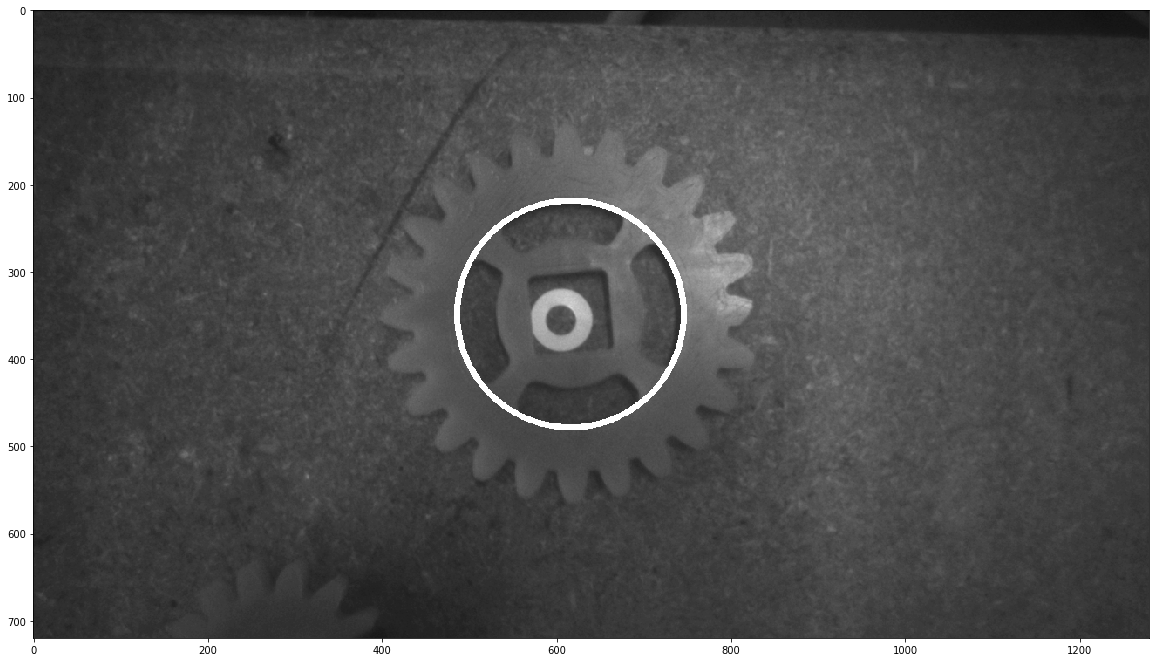

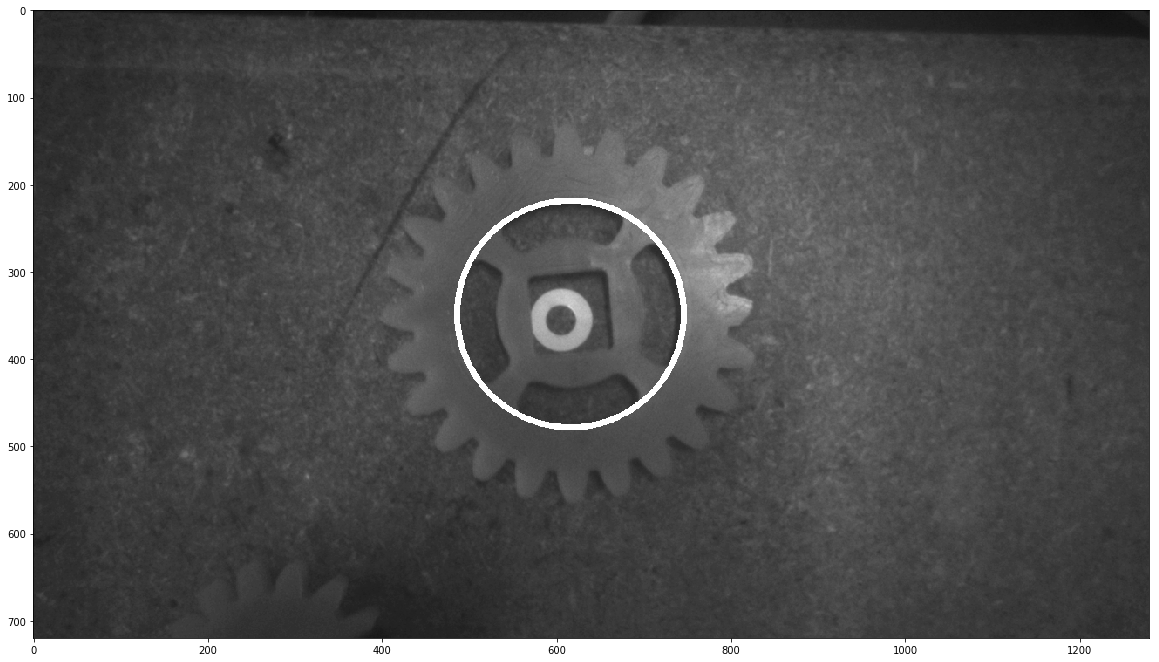

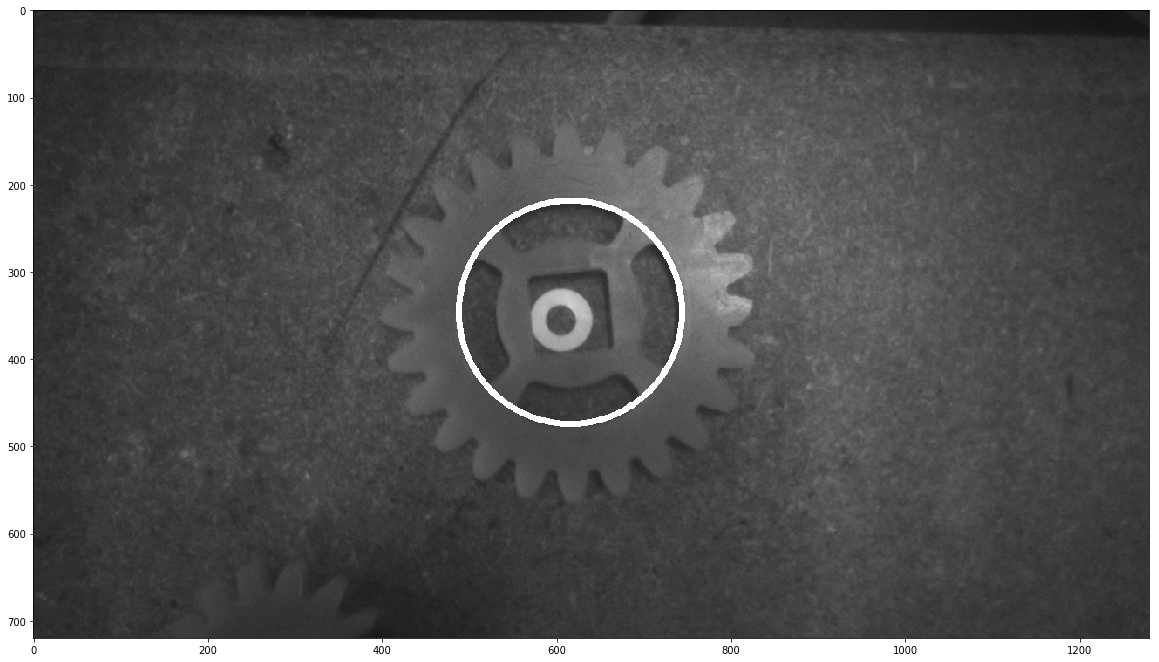

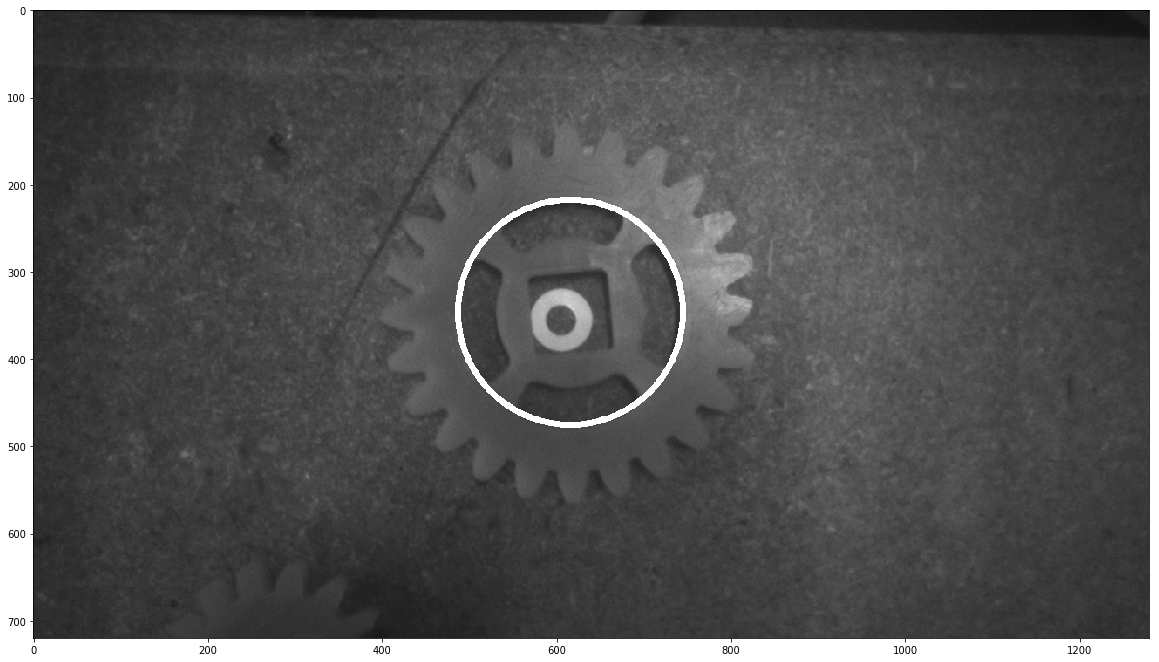

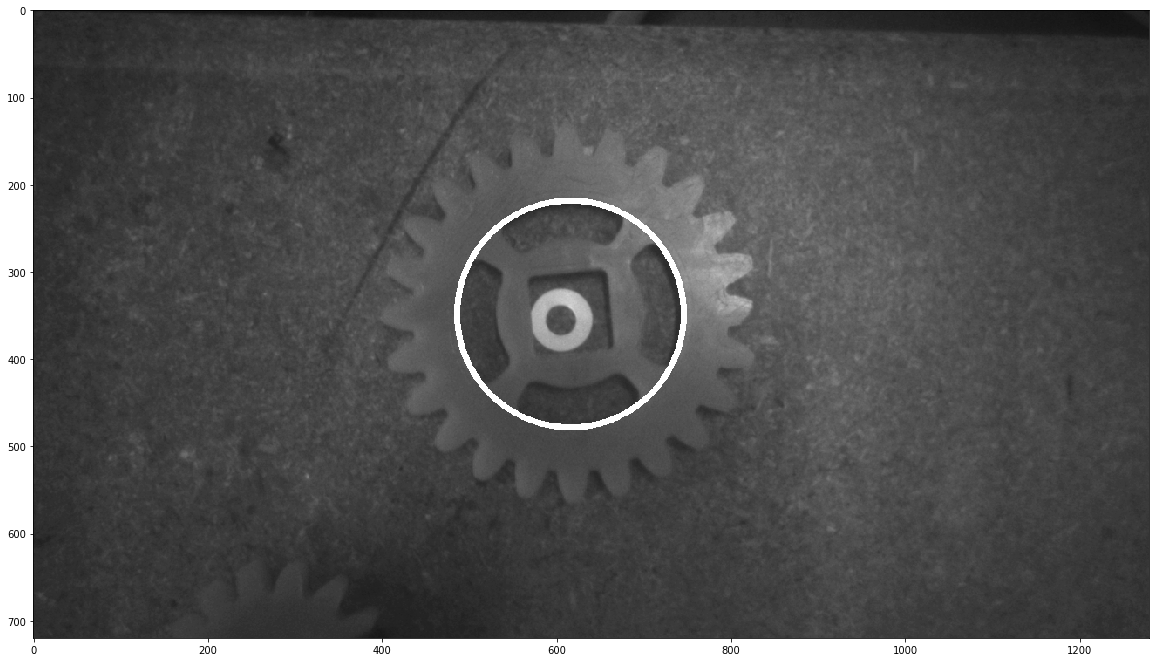

In [7]:
#Tune center circle parameters
#Tune parameters to minimize false circles and find desired circle in most images
view_distance = feature_dictionary[feature_name]["view_distance"]
circle_locator_params = rm.tune_circle_locator(min_hough_dist=100, param1=50, param2=15, image_blur=1,
                                               z_dist_to_cir=view_distance, cir_dia=0.050, dia_tol=0.001, max_loops=5)
print(circle_locator_params)
feature_dictionary[feature_name]["circle_locator_params"] = circle_locator_params

# General Part Location Parameters

In [9]:
rm.open_gripper()

0

In [11]:
#Tune general part parameters
general_part_locator_params = rm.tune_cloud_locator(disparity_shift=170, leaf_size=0.0008, search_radius=0.0033, min_cluster_size=250,max_cluster_size=10000000)
print(general_part_locator_params)
feature_dictionary[feature_name]["cloud_locator_params"] = general_part_locator_params

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-0.013079173585085329, 0.11315320520989659, …

[170, 0.0008, 0.0033, 250, 10000000]


# Save Feature

In [8]:
with open(file_name, 'wb') as f:
    pickle.dump(feature_dictionary, f, pickle.DEFAULT_PROTOCOL)